19.847607361963192

2.1) 

   Amostra    A    B  A ∩ B  A ∪ B   A'
0        1  0.5  0.7    0.5    0.7  0.5
1        2  1.0  0.4    0.4    1.0  0.0
2        3  0.6  0.5    0.5    0.6  0.4
3        4  1.0  0.0    0.0    1.0  0.0
4        5  0.4  0.3    0.3    0.4  0.6
5        6  0.7  0.8    0.7    0.8  0.3
6        7  0.5  1.0    0.5    1.0  0.5
7        8  0.3  0.8    0.3    0.8  0.7
8        9  0.7  0.6    0.6    0.7  0.3
9       10  0.0  0.5    0.0    0.5  1.0


c:\dev\scoop\apps\python\current\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


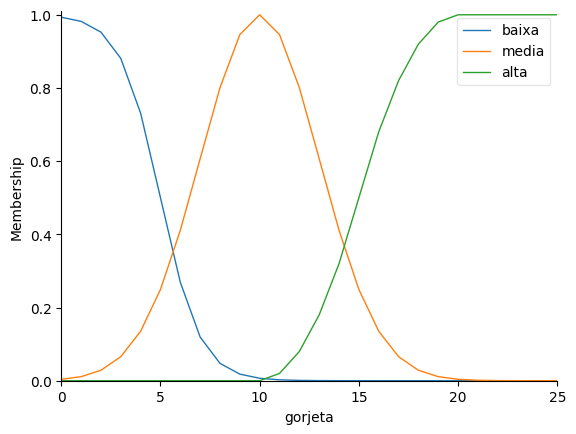

In [1]:
# -*- coding: utf-8 -*-
"""Aula BES IA - Sistemas fuzzy.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1MRr0va7EX8h2lIAxumfJNYwWcctTgIih
"""

#Bibioteca
#pip install scikit-fuzzy
#pip install packaging
#pip install networkx
#pip install matplotlib
#pip install pandas

import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#  antecedente / variaveis linguisticas
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

# função de pertinência (3, 5, or 7)
qualidade.automf(3, names=['ruim','boa','saborosa'])
servico.automf(3, names=['ruim','aceitável','ótimo'])
#servico.automf(3)

# Customizando as funções de pertinência
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 13, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [13, 25, 25])

"""view"""

# visualização das funções de pertinência
#qualidade['boa'].view()
# qualidade.view()
# servico.view()

# gorjeta.view()

# Regras
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

# regra1.view()
# regra2.view()
# regra3.view()

"""Criação do sistema de controle e simulação"""

regras = ctrl.ControlSystem([regra1, regra2, regra3])
sistema_fuzzy = ctrl.ControlSystemSimulation(regras)

"""Exemplo: taxa de qualidade 6.5 de 10 e serviço 9.8 de 10."""

# Testando
sistema_fuzzy.input['qualidade'] = 6.5
sistema_fuzzy.input['servico'] = 9.8

# Computando
sistema_fuzzy.compute()

"""Resultado e visualização do conjunto fuzzy gorjeta


"""

print (sistema_fuzzy.output['gorjeta'])
# gorjeta.view(sim=sistema_fuzzy)

"""Referência:

https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_tipping_problem_newapi.html
"""

print()

print("2.1)", "\n")

data = {
    "Amostra": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "A": [0.5, 1.0, 0.6, 1.0, 0.4, 0.7, 0.5, 0.3, 0.7, 0.0],
    "B": [0.7, 0.4, 0.5, 0.0, 0.3, 0.8, 1.0, 0.8, 0.6, 0.5],
}

df = pd.DataFrame(data)

df["A ∩ B"] = df[["A", "B"]].min(axis=1)
df["A ∪ B"] = df[["A", "B"]].max(axis=1)
df["A'"] = 1 - df["A"]

print(df)

gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 25, 50)

gorjeta.view()

In [4]:
# -*- coding: utf-8 -*-
"""Aula BES IA - Sistemas fuzzy.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1MRr0va7EX8h2lIAxumfJNYwWcctTgIih
"""

#Bibioteca
#pip install scikit-fuzzy
#pip install packaging
#pip install networkx
#pip install matplotlib
#pip install pandas

import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#  antecedente / variaveis linguisticas
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

# função de pertinência (3, 5, or 7)
qualidade.automf(3, names=['ruim','boa','saborosa'])
servico.automf(3, names=['ruim','aceitável','ótimo'])
#servico.automf(3)

# Customizando as funções de pertinência
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 13, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [13, 25, 25])

"""view"""

# visualização das funções de pertinência
#qualidade['boa'].view()
# qualidade.view()
# servico.view()

# gorjeta.view()

# Regras
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

# regra1.view()
# regra2.view()
# regra3.view()

"""Criação do sistema de controle e simulação"""

regras = ctrl.ControlSystem([regra1, regra2, regra3])
sistema_fuzzy = ctrl.ControlSystemSimulation(regras)

"""Exemplo: taxa de qualidade 6.5 de 10 e serviço 9.8 de 10."""

# Testando
# 2.2) c) output: 6.586329729276677
sistema_fuzzy.input['qualidade'] = 0.5
sistema_fuzzy.input['servico'] = 0.5

# Computando
sistema_fuzzy.compute()

"""Resultado e visualização do conjunto fuzzy gorjeta


"""

print (sistema_fuzzy.output['gorjeta'])
#gorjeta.view(sim=sistema_fuzzy)

"""Referência:

https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_tipping_problem_newapi.html
"""

print()

print("2.1)", "\n")

data = {
    "Amostra": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "A": [0.5, 1.0, 0.6, 1.0, 0.4, 0.7, 0.5, 0.3, 0.7, 0.0],
    "B": [0.7, 0.4, 0.5, 0.0, 0.3, 0.8, 1.0, 0.8, 0.6, 0.5],
}

df = pd.DataFrame(data)

df["A ∩ B"] = df[["A", "B"]].min(axis=1)
df["A ∪ B"] = df[["A", "B"]].max(axis=1)
df["A'"] = 1 - df["A"]

print(df)

print("2.2)", "\n")
print("a)", "\n")
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 25, 50)

print("b)", "\n")
# gorjeta.view() # rodar `jupyter lab` no terminal e rodar o codigo ou abrir o systema_fuzzy.ipynb no `vscode`


19.847607361963192

2.1) 

   Amostra    A    B  A ∩ B  A ∪ B   A'
0        1  0.5  0.7    0.5    0.7  0.5
1        2  1.0  0.4    0.4    1.0  0.0
2        3  0.6  0.5    0.5    0.6  0.4
3        4  1.0  0.0    0.0    1.0  0.0
4        5  0.4  0.3    0.3    0.4  0.6
5        6  0.7  0.8    0.7    0.8  0.3
6        7  0.5  1.0    0.5    1.0  0.5
7        8  0.3  0.8    0.3    0.8  0.7
8        9  0.7  0.6    0.6    0.7  0.3
9       10  0.0  0.5    0.0    0.5  1.0
